This project is an implementation of the paper **"Classification of thyroid hormone receptor agonists and antagonists using statistical learning approaches".** A QSAR classification model is built for differentiating between Thyroid receptor (TR) agonists and antagonists. The dataset is collected from the literature. 

In [1]:
import pandas as pd 
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
from rdkit.Chem import MACCSkeys
from rdkit.Chem import AllChem
import numpy as np
from rdkit.Chem import Draw

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,smiles,label
0,OC1=CC=C([C@@H](CCCCCCCCCCC(N(C)CCCC)=O)C2=C(C...,-
1,OC1=C(C(C)C)C=C(CC2=C(C)C=C(OCC(O)=O)C=C2C)C=C...,-
2,OC1=CC=C(N(C)C2=C(C)C=C(C[C@H](S3)C(NC3=O)=O)C...,-
3,OC1=CC=C(N(CC2CC2)C3=C(C)C=C(C[C@H](S4)C(NC4=O...,-
4,OC1=CC=C(N(CCCCCC)C2=C(C)C=C(C[C@H](S3)C(NC3=O...,-


In [4]:
df.shape

(259, 2)

+ The dataset is comprised of 259 molecules.

In [5]:
df.label

0      -
1      -
2      -
3      -
4      -
      ..
254    +
255    +
256    +
257    +
258    +
Name: label, Length: 259, dtype: object

+ The label is designated as (+) and (-) indicating an **agonist** and **antagonist** respectively. We will change them to (1) and (0)

In [6]:
df["label"].replace(to_replace="-",value="0",inplace=True)

In [7]:
df["label"].replace(to_replace="+",value="1",inplace=True)

In [8]:
df.head()

,smiles,label
0,OC1=CC=C([C@@H](CCCCCCCCCCC(N(C)CCCC)=O)C2=C(C...,0
1,OC1=C(C(C)C)C=C(CC2=C(C)C=C(OCC(O)=O)C=C2C)C=C...,0
2,OC1=CC=C(N(C)C2=C(C)C=C(C[C@H](S3)C(NC3=O)=O)C...,0
3,OC1=CC=C(N(CC2CC2)C3=C(C)C=C(C[C@H](S4)C(NC4=O...,0
4,OC1=CC=C(N(CCCCCC)C2=C(C)C=C(C[C@H](S3)C(NC3=O...,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   smiles  259 non-null    object
 1   label   258 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


+ The label column has one missing value. After checking, it should be filled with (1)

In [10]:
df.fillna(value="1",inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   smiles  259 non-null    object
 1   label   259 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

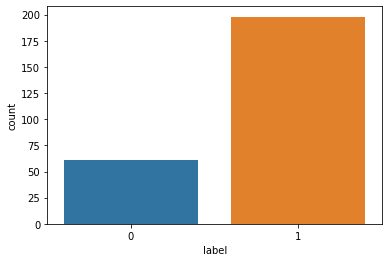

In [12]:
sns.countplot(x=df["label"])

In [13]:
df["label"].value_counts()

1    198
0     61
Name: label, dtype: int64

+ The dataset contains more agonists than antagonists.

### Chemical Space analysis

In [14]:
df.head()

,smiles,label
0,OC1=CC=C([C@@H](CCCCCCCCCCC(N(C)CCCC)=O)C2=C(C...,0
1,OC1=C(C(C)C)C=C(CC2=C(C)C=C(OCC(O)=O)C=C2C)C=C...,0
2,OC1=CC=C(N(C)C2=C(C)C=C(C[C@H](S3)C(NC3=O)=O)C...,0
3,OC1=CC=C(N(CC2CC2)C3=C(C)C=C(C[C@H](S4)C(NC4=O...,0
4,OC1=CC=C(N(CCCCCC)C2=C(C)C=C(C[C@H](S3)C(NC3=O...,0


In [15]:
PandasTools.AddMoleculeColumnToFrame(df,"smiles")

RDKit ERROR: [13:58:40] SMILES Parse Error: syntax error while parsing: ClC[14]=C(C(Cl)=CC(CC(O)=O)=C@14)OC[4]=CC=C(NC(C[S=I]H(C)CC)=O)C(Br)=C@5
[13:58:40] SMILES Parse Error: syntax error while parsing: ClC[14]=C(C(Cl)=CC(CC(O)=O)=C@14)OC[4]=CC=C(NC(C[S=I]H(C)CC)=O)C(Br)=C@5
RDKit ERROR: [13:58:40] SMILES Parse Error: Failed parsing SMILES 'ClC[14]=C(C(Cl)=CC(CC(O)=O)=C@14)OC[4]=CC=C(NC(C[S=I]H(C)CC)=O)C(Br)=C@5' for input: 'ClC[14]=C(C(Cl)=CC(CC(O)=O)=C@14)OC[4]=CC=C(NC(C[S=I]H(C)CC)=O)C(Br)=C@5'
[13:58:40] SMILES Parse Error: Failed parsing SMILES 'ClC[14]=C(C(Cl)=CC(CC(O)=O)=C@14)OC[4]=CC=C(NC(C[S=I]H(C)CC)=O)C(Br)=C@5' for input: 'ClC[14]=C(C(Cl)=CC(CC(O)=O)=C@14)OC[4]=CC=C(NC(C[S=I]H(C)CC)=O)C(Br)=C@5'


,smiles,label,ROMol
0,OC1=CC=C([C@@H](CCCCCCCCCCC(N(C)CCCC)=O)C2=C(C...,0,
1,OC1=C(C(C)C)C=C(CC2=C(C)C=C(OCC(O)=O)C=C2C)C=C...,0,
2,OC1=CC=C(N(C)C2=C(C)C=C(C[C@H](S3)C(NC3=O)=O)C...,0,
3,OC1=CC=C(N(CC2CC2)C3=C(C)C=C(C[C@H](S4)C(NC4=O...,0,
4,OC1=CC=C(N(CCCCCC)C2=C(C)C=C(C[C@H](S3)C(NC3=O...,0,

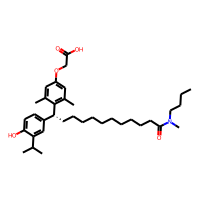
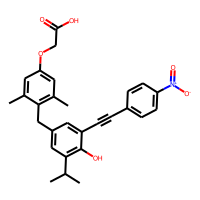
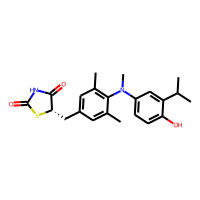
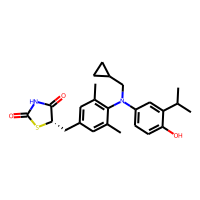
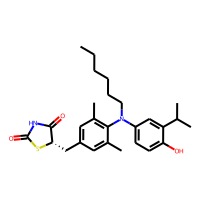

In [16]:
df.head()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   smiles  259 non-null    object
 1   label   259 non-null    object
 2   ROMol   258 non-null    object
dtypes: object(3)
memory usage: 6.2+ KB


In [18]:
df.dropna(axis=0,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 258
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   smiles  258 non-null    object
 1   label   258 non-null    object
 2   ROMol   258 non-null    object
dtypes: object(3)
memory usage: 8.1+ KB


,smiles,label,ROMol
0,OC1=CC=C([C@@H](CCCCCCCCCCC(N(C)CCCC)=O)C2=C(C...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
1,OC1=C(C(C)C)C=C(CC2=C(C)C=C(OCC(O)=O)C=C2C)C=C...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
2,OC1=CC=C(N(C)C2=C(C)C=C(C[C@H](S3)C(NC3=O)=O)C...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
3,OC1=CC=C(N(CC2CC2)C3=C(C)C=C(C[C@H](S4)C(NC4=O...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
4,OC1=CC=C(N(CCCCCC)C2=C(C)C=C(C[C@H](S3)C(NC3=O...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"

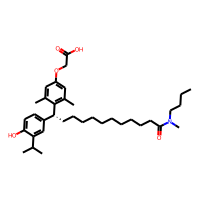
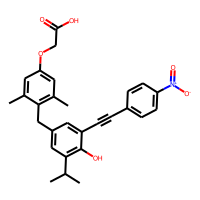
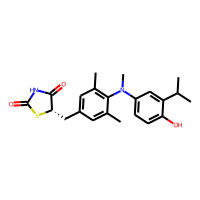
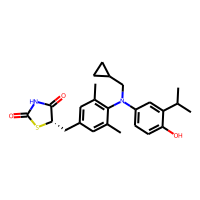
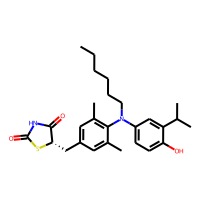

In [20]:
df.head()

+ We will calculate some descriptors to analyze chemical space of agonists and antagonists.

In [21]:
df["Molwt"] = df["ROMol"].apply(Descriptors.MolWt)
df["LogP"] = df["ROMol"].apply(Descriptors.MolLogP)
df["HBA"] = df["ROMol"].apply(Descriptors.NumHAcceptors)
df["HBD"] = df["ROMol"].apply(Descriptors.NumHDonors)

,smiles,label,ROMol,Molwt,LogP,HBA,HBD
0,OC1=CC=C([C@@H](CCCCCCCCCCC(N(C)CCCC)=O)C2=C(C...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",581.838,8.88724,4,2
1,OC1=C(C(C)C)C=C(CC2=C(C)C=C(OCC(O)=O)C=C2C)C=C...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",473.525,5.49464,5,2
2,OC1=CC=C(N(C)C2=C(C)C=C(C[C@H](S3)C(NC3=O)=O)C...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",398.528,4.79444,5,2
3,OC1=CC=C(N(CC2CC2)C3=C(C)C=C(C[C@H](S4)C(NC4=O...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",438.593,5.57464,5,2
4,OC1=CC=C(N(CCCCCC)C2=C(C)C=C(C[C@H](S3)C(NC3=O...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",468.663,6.74494,5,2

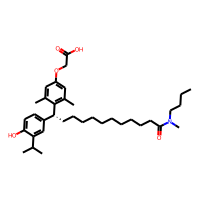
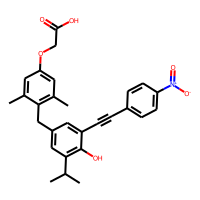
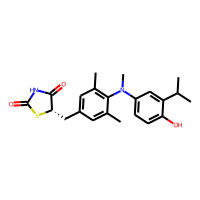
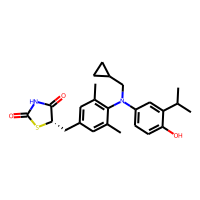
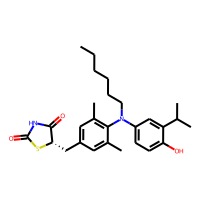

In [22]:
df.head()

<AxesSubplot:xlabel='label', ylabel='Molwt'>

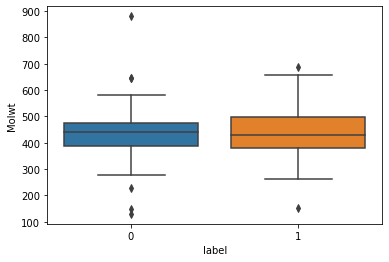

In [23]:
sns.boxplot(x=df["label"],y=df["Molwt"])

+ Both Agonists and antagonists almost share similar Molwt.

<AxesSubplot:xlabel='label', ylabel='LogP'>

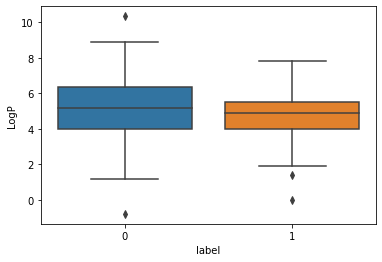

In [24]:
sns.boxplot(x=df["label"],y=df["LogP"])

<AxesSubplot:xlabel='label', ylabel='HBA'>

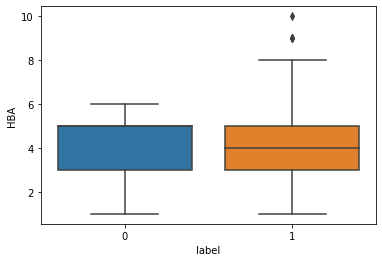

In [25]:
sns.boxplot(x=df["label"],y=df["HBA"])

<AxesSubplot:xlabel='label', ylabel='HBD'>

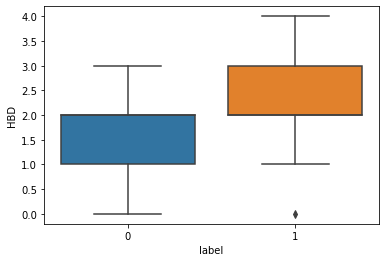

In [26]:
sns.boxplot(x=df["label"],y=df["HBD"])

+ Agonists tend to have more Hb doners.

<AxesSubplot:xlabel='Molwt', ylabel='LogP'>

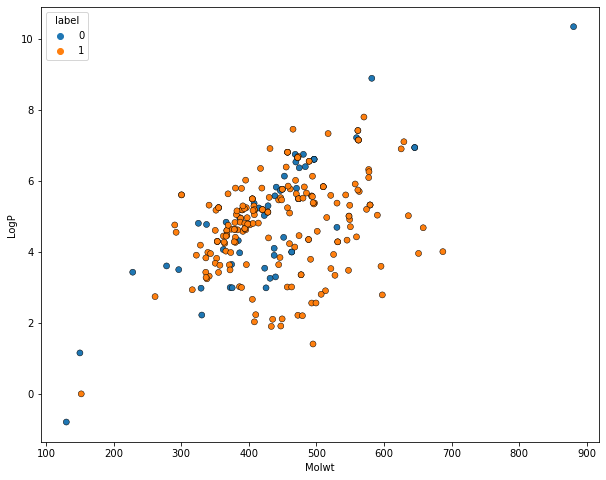

In [27]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df["Molwt"],y=df["LogP"],hue=df["label"],alpha=1,edgecolor="black")

In [28]:
mannwhitneyu(df["HBA"],df["HBD"])

NameError: name 'mannwhitneyu' is not defined

In [29]:
df[["Molwt","label"]]

,Molwt,label
0,581.838,0
1,473.525,0
2,398.528,0
3,438.593,0
4,468.663,0
...,...,...
254,433.255,1
255,449.254,1
256,447.282,1
257,410.217,1


In [30]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'label']
  df_ = df[selection]
  agonist = df_[df_['label'] == "1"]
  agonist = agonist[descriptor]

  selection = [descriptor, 'label']
  df_ = df[selection]
  antagonist = df_[df_['label'] == "0"]
  antagonist = antagonist[descriptor]

# compare samples
  stat, p = mannwhitneyu(agonist, antagonist)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  return results

In [31]:
mannwhitney("Molwt")

,Descriptor,Statistics,p,alpha,Interpretation
0,Molwt,5940.5,0.447278,0.05,Same distribution (fail to reject H0)


In [32]:
mannwhitney("LogP")

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,5324.0,0.089622,0.05,Same distribution (fail to reject H0)


In [33]:
mannwhitney("HBA")

,Descriptor,Statistics,p,alpha,Interpretation
0,HBA,5101.5,0.033536,0.05,Different distribution (reject H0)


In [34]:
mannwhitney("HBD")

,Descriptor,Statistics,p,alpha,Interpretation
0,HBD,4366.5,0.000207,0.05,Different distribution (reject H0)


### Molecular Descriptors

+ In the paper, DRAGON software (currently not available) was used for descriptors Generation. Here morgan fingerprints and MACCS will be generated.

,smiles,label,ROMol,Molwt,LogP,HBA,HBD
0,OC1=CC=C([C@@H](CCCCCCCCCCC(N(C)CCCC)=O)C2=C(C...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",581.838,8.88724,4,2
1,OC1=C(C(C)C)C=C(CC2=C(C)C=C(OCC(O)=O)C=C2C)C=C...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",473.525,5.49464,5,2
2,OC1=CC=C(N(C)C2=C(C)C=C(C[C@H](S3)C(NC3=O)=O)C...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",398.528,4.79444,5,2
3,OC1=CC=C(N(CC2CC2)C3=C(C)C=C(C[C@H](S4)C(NC4=O...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",438.593,5.57464,5,2
4,OC1=CC=C(N(CCCCCC)C2=C(C)C=C(C[C@H](S3)C(NC3=O...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",468.663,6.74494,5,2

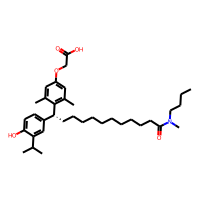
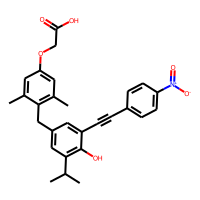
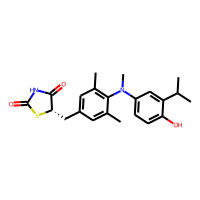
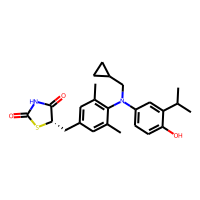
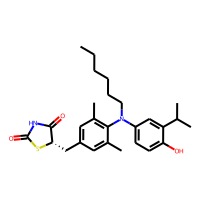

In [35]:
df.head()

In [36]:
mfp = []
for mol in df.ROMol:
    molH = AllChem.AddHs(mol)
    mfp.append(AllChem.GetMorganFingerprintAsBitVect(molH,2,1024))

In [37]:
mfp = np.asarray(mfp,dtype=np.float32)

In [38]:
maccs = []
for mol in df.ROMol:
    molH = AllChem.AddHs(mol)
    maccs.append(MACCSkeys.GenMACCSKeys(molH))

In [39]:
maccs = np.asarray(maccs,dtype=np.float32)

In [40]:
maccs

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]], dtype=float32)

### Feature Selection 

In order to reduce the information obviously redundant, the descriptors with > 95% zeros are excluded.

In [41]:
from sklearn.feature_selection import VarianceThreshold

In [42]:
var = VarianceThreshold(threshold=0.05)

In [43]:
mfp = var.fit_transform(mfp)

In [44]:
len(mfp[0])

146

+ The number of morganfingerprints decreases from 1024 to 146. 

In [45]:
var.get_feature_names_out()

array(['x0', 'x5', 'x20', 'x26', 'x29', 'x36', 'x41', 'x53', 'x70', 'x73',
       'x76', 'x77', 'x81', 'x88', 'x114', 'x119', 'x122', 'x133', 'x139',
       'x145', 'x146', 'x171', 'x174', 'x175', 'x182', 'x186', 'x189',
       'x192', 'x197', 'x201', 'x213', 'x219', 'x223', 'x228', 'x248',
       'x264', 'x267', 'x276', 'x282', 'x285', 'x301', 'x313', 'x314',
       'x317', 'x333', 'x341', 'x347', 'x350', 'x353', 'x365', 'x366',
       'x378', 'x400', 'x407', 'x416', 'x429', 'x434', 'x436', 'x449',
       'x453', 'x466', 'x482', 'x486', 'x494', 'x504', 'x505', 'x518',
       'x519', 'x546', 'x547', 'x548', 'x561', 'x579', 'x586', 'x592',
       'x593', 'x595', 'x596', 'x607', 'x608', 'x617', 'x619', 'x632',
       'x635', 'x649', 'x656', 'x659', 'x667', 'x669', 'x674', 'x675',
       'x677', 'x685', 'x692', 'x701', 'x708', 'x714', 'x715', 'x723',
       'x725', 'x728', 'x753', 'x754', 'x759', 'x771', 'x774', 'x782',
       'x783', 'x790', 'x799', 'x807', 'x809', 'x816', 'x828', 'x831'

In [46]:
maccs = var.fit_transform(maccs)

In [47]:
len(maccs[0])

113

### Self Organizing Map (SOM)

+ SOM was used for clustering of molecules and data was split into training and test sets according to molecules distribution. We will use Morgan FP to generate SOM and visualize it.

In [48]:
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from minisom import MiniSom

In [49]:
# 8x8 SOM

som = MiniSom(6,6,len(mfp[0]),sigma=0.5,learning_rate=0.5,random_seed=42)

In [50]:
som.train_random(mfp,num_iteration=20000)

In [51]:
x = []
y =[]

for row in mfp:
    x_val,y_val = som.winner(row)
    x.append(x_val)
    y.append(y_val)

In [52]:
mfp_ = pd.DataFrame(mfp)

In [53]:
mfp_.head()

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
mfp_["label"] = df["label"]
mfp_["X"] = x
mfp_["Y"] = y

In [55]:
mfp_.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,label,X,Y
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,4,4
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,3,3
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,4
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,4
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,4


In [56]:
# Adapted from the MiniSom example notebook
def depict_som(cluster_df, x_dim, y_dim, x_column="X", y_column="Y"):
    """
    Draw a SOM with each cell depicted as a pie chart
    :param cluster_df: data frame with SOM output, should have columns active, X, and Y
    :param x_dim: X dimension of the SOM
    :param y_dim: Y dimension of the SOM
    :return:
    """
    required_colums = [x_column, y_column, "label"]
    for col in required_colums:
        if col not in cluster_df.columns:
            print(f"Error {col} not in dataframe columns", file=sys.stderr)
            sys.exit(1)
    cell_dict = {}
    for k, v in [x for x in cluster_df.groupby([x_column, y_column])]:
        cell_dict[k] = Counter(v["label"])
        cell_names = cluster_df["label"].unique()
    plt.figure(figsize=(x_dim, y_dim))
    the_grid = GridSpec(x_dim, y_dim)
    for position in cell_dict.keys():
        label_fracs = [cell_dict[position][l] for l in cell_names]
        plt.subplot(the_grid[(x_dim - 1) - position[1], position[0]], aspect=1)
        patches, texts = plt.pie(label_fracs)

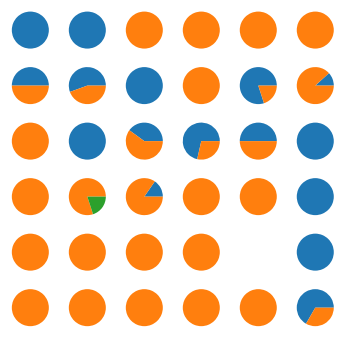

In [57]:
depict_som(mfp_,8,8)

In [58]:
df["X"] = x
df["Y"] = y

,smiles,label,ROMol,Molwt,LogP,HBA,HBD,X,Y
0,OC1=CC=C([C@@H](CCCCCCCCCCC(N(C)CCCC)=O)C2=C(C...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",581.838,8.88724,4,2,4,4
1,OC1=C(C(C)C)C=C(CC2=C(C)C=C(OCC(O)=O)C=C2C)C=C...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",473.525,5.49464,5,2,3,3
2,OC1=CC=C(N(C)C2=C(C)C=C(C[C@H](S3)C(NC3=O)=O)C...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",398.528,4.79444,5,2,2,4
3,OC1=CC=C(N(CC2CC2)C3=C(C)C=C(C[C@H](S4)C(NC4=O...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",438.593,5.57464,5,2,2,4
4,OC1=CC=C(N(CCCCCC)C2=C(C)C=C(C[C@H](S3)C(NC3=O...,0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",468.663,6.74494,5,2,2,4

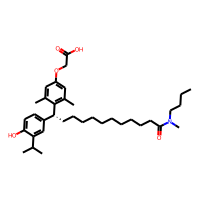
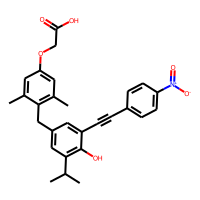
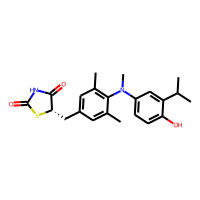
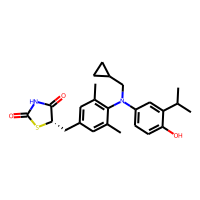
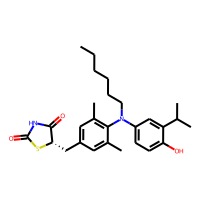

In [59]:
df.head()

In [60]:
df.drop(["ROMol","Molwt","LogP","HBA","HBA"],axis=1,inplace=True)

In [61]:
df.head()

,smiles,label,HBD,X,Y
0,OC1=CC=C([C@@H](CCCCCCCCCCC(N(C)CCCC)=O)C2=C(C...,0,2,4,4
1,OC1=C(C(C)C)C=C(CC2=C(C)C=C(OCC(O)=O)C=C2C)C=C...,0,2,3,3
2,OC1=CC=C(N(C)C2=C(C)C=C(C[C@H](S3)C(NC3=O)=O)C...,0,2,2,4
3,OC1=CC=C(N(CC2CC2)C3=C(C)C=C(C[C@H](S4)C(NC4=O...,0,2,2,4
4,OC1=CC=C(N(CCCCCC)C2=C(C)C=C(C[C@H](S3)C(NC3=O...,0,2,2,4


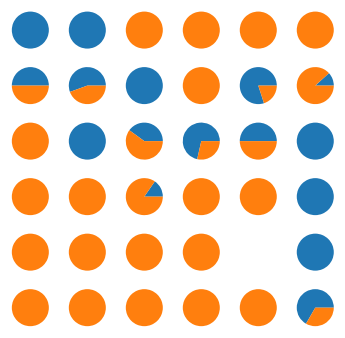

In [62]:
depict_som(df,8,8)

+ Agonists are shown as orange and Antagonists are shown as blue.

In [63]:
my_cell = df.query("X==3 and Y==3")

In [64]:
my_cell

,smiles,label,HBD,X,Y
1,OC1=C(C(C)C)C=C(CC2=C(C)C=C(OCC(O)=O)C=C2C)C=C...,0,2,3,3
9,OC1=C(C2=CC=C([N+]([O-])=O)C=C2)C=C(CC3=C(C)C=...,0,2,3,3
27,CC1=CC(OCC(O)=O)=CC(C)=C1CC2=CC(C(C)C)=C(O)C(C...,0,2,3,3
30,OC1=C(C2=CC=C(N(=O)=O)C=C2)C=C(CC3=C(C)C=C(OCC...,0,2,3,3
31,OC1=C(C#CC2=CC=C(N(=O)=O)C=C2)C=C(CC3=C(C)C=C(...,0,2,3,3
138,CC1=CC(OCC(O)=O)=CC(C)=C1CC2=CC(C3=CC=C(N(=O)=...,1,2,3,3
139,CC1=CC(OCC(O)=O)=CC(C)=C1CC2=CC(C#CC3=CC=C(N(=...,1,2,3,3


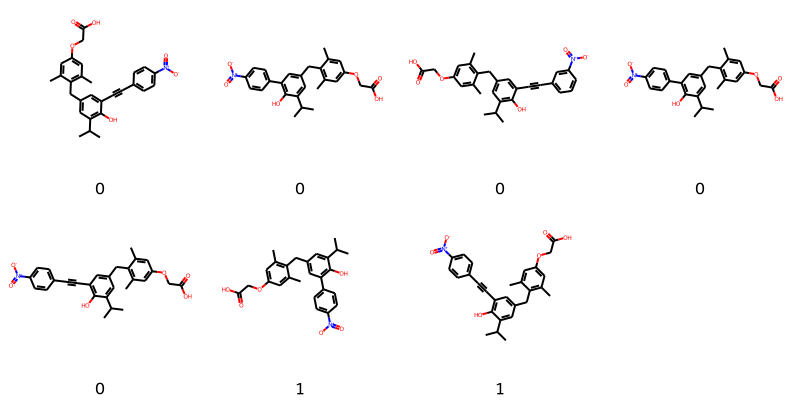

In [65]:
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in my_cell.smiles],molsPerRow=4,legends=list(my_cell.label))

+ We will not use SOM for splitting the data. We will adopt similar way.

In [66]:
mfp_.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,label,X,Y
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,4,4
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,3,3
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,4
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,4
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,2,4


In [67]:
mfp_.drop(["X","Y"],axis=1,inplace=True)

In [68]:
mfp_

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,label
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1


In [69]:
mfp_.to_csv("mfp.csv",header=True,index=False,sep="\t")

In [70]:
maccs = pd.DataFrame(maccs)

In [71]:
maccs.head()

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [72]:
maccs["label"] = df["label"]

In [73]:
maccs.to_csv("maccs.csv",header=True,index=False,sep="\t")